In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [15]:
data = pd.read_csv('shopping_trends_updated.csv')
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [17]:
print(data.isnull().sum())

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [18]:
data.duplicated().sum()

0

In [19]:
le = LabelEncoder()
data["Frequency of Purchases"] = le.fit_transform(data["Frequency of Purchases"])
X = data[['Frequency of Purchases', 'Age',"Purchase Amount (USD)"]]
X

,Frequency of Purchases,Age,Purchase Amount (USD)
0,3,55,53
1,3,19,64
2,6,50,73
3,6,21,90
4,0,45,49
...,...,...,...
3895,6,40,28
3896,1,52,49
3897,5,46,33
3898,6,44,77


In [20]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Frequency of Purchases,3900.0,2.974872,1.998559,0.0,1.0,3.0,5.0,6.0
Age,3900.0,44.068462,15.207589,18.0,31.0,44.0,57.0,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.0,60.0,81.0,100.0


In [21]:
X.corr()

,Frequency of Purchases,Age,Purchase Amount (USD)
Frequency of Purchases,1.000000,0.017406,-0.017219
Age,0.017406,1.000000,-0.010424
Purchase Amount (USD),-0.017219,-0.010424,1.000000


## K- Means Clustering

In [22]:
kmeans = KMeans(n_clusters=3,init="k-means++" )
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans

c:\Users\Yunus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 2, 1, ..., 0, 1, 1])

### Visualization

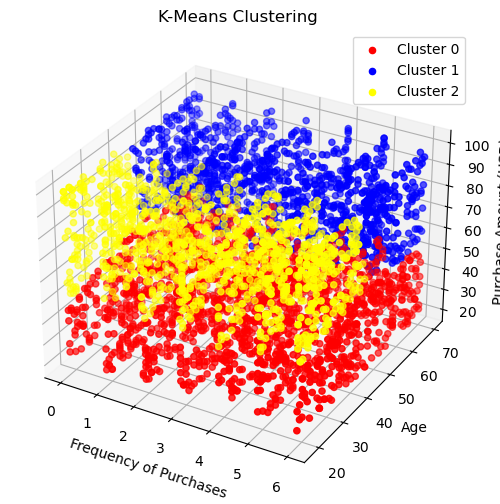

In [23]:
def plot_3d_clusters(y_pred,cluster_type) :
      fig = plt.figure(figsize=(8, 6))
      ax = fig.add_subplot(111, projection='3d')

      colors = ['red', 'blue', 'yellow']
      for cluster_label in range(3):
            ax.scatter(X[y_pred == cluster_label]['Frequency of Purchases'],
                              X[y_pred == cluster_label]['Age'],
                              X[y_pred == cluster_label]["Purchase Amount (USD)"],
                              label=f'Cluster {cluster_label}', c=colors[cluster_label])


      ax.set_xlabel('Frequency of Purchases')
      ax.set_ylabel('Age')
      ax.set_zlabel('Purchase Amount (USD)',)
      ax.set_title(f'{cluster_type} Clustering ')
      ax.legend()
      plt.show()
plot_3d_clusters(kmeans.labels_,"K-Means")



### WCSS

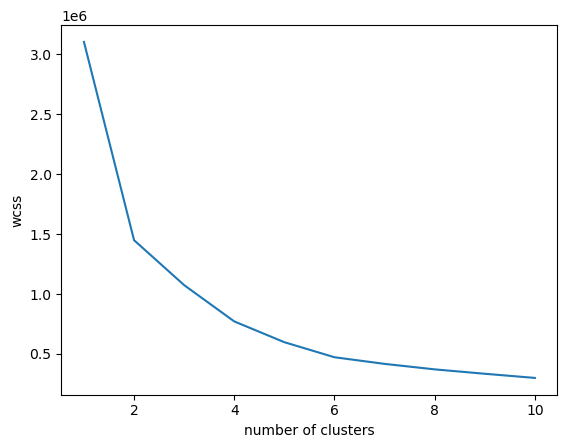

In [24]:
wcss = []
for i in range(1,11):       #range value
  kmeans = KMeans( n_clusters=i , init="k-means++" , random_state = 42,n_init=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

#plotting graph
plt.plot(range(1,11),wcss)
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()


# Hierarchical Clustering (Agglomerative)

c:\Users\Yunus\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


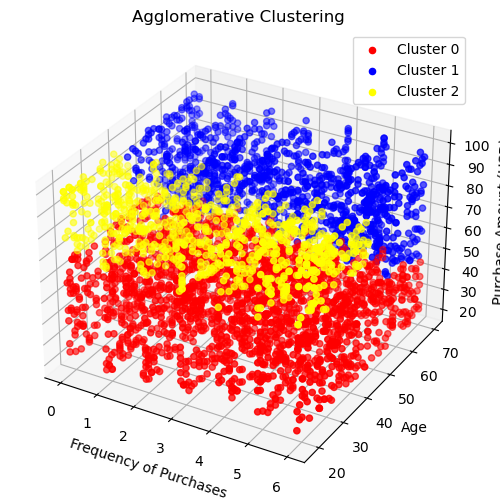

In [25]:
ac = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
y_pred = ac.fit_predict(X)
y_pred
plot_3d_clusters(y_pred,"Agglomerative")


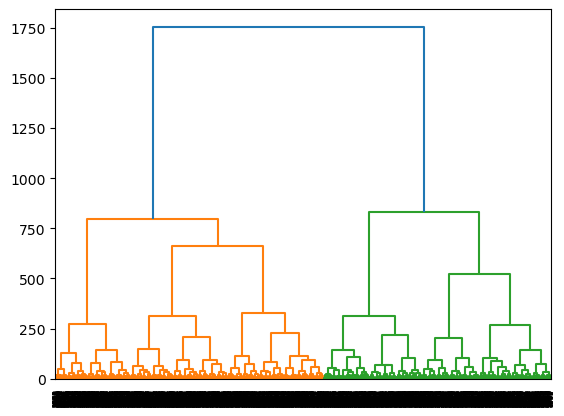

In [26]:
dendogram = sch.dendrogram(sch.linkage(X,method="ward"))
plt.show()